In [48]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

In [42]:
train= h5py.File('train_happy.h5', 'r')
test=h5py.File('test_happy.h5','r')
train_x = np.array(train['train_set_x'][:])
train_y = np.array(train['train_set_y'][:])

test_x = np.array(test['test_set_x'][:])
test_y = np.array(test['test_set_y'][:])
print(train_x.shape)
print(test_x.shape)

(600, 64, 64, 3)
(150, 64, 64, 3)


## normalization

In [44]:
norm_train=train_x/255.0
norm_test=test_x/255.0


## visualizing 

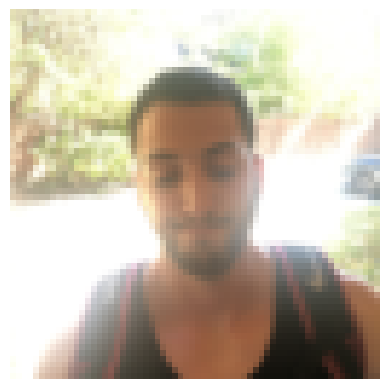

In [47]:
plt.imshow(norm_train[124])
plt.axis('off')
plt.show()

## model

In [55]:
model=tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=3,input_shape=(64,64,3)),
    tf.keras.layers.Conv2D(32,(7,7),strides=1),## no.of filter,size of filter,stride
    tf.keras.layers.BatchNormalization(axis=3), ##Normalize over H × W × batch, but separately for each channel.
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),#default filter size=2,stride=2
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_6 (ZeroPadding2D)     │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

## training

batch_size is the number of training samples processed together before the model updates its weights once.

In [66]:
model.fit(norm_train,train_y,epochs=10,batch_size=16)#batch_size is the number of training samples processed together before the model updates its weights once.

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9633 - loss: 0.1077
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9817 - loss: 0.0481
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9583 - loss: 0.1100
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9617 - loss: 0.1056
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9783 - loss: 0.0555
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9767 - loss: 0.0540
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9850 - loss: 0.0402
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9867 - loss: 0.0469
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9933 - loss: 0.0324
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9850 - loss: 0.0361


## evaluating the model using test data 

In [67]:
model.evaluate(norm_test,test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9200 - loss: 0.1484


[0.14842607080936432, 0.9200000166893005]

# functional API